<a href="https://colab.research.google.com/github/richardli03/visualalignment/blob/main/Clew_Sample_Analysis_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample Clew Analysis

This notebook downloads a snapshot of Clew data and performs some basic analysis on it.

In [ ]:
!git clone https://github.com/occamlab/Clew
!cd Clew; git pull; cd ..
!gdown --id 1_HzGrHtkWULEzbkOs5VKKHfAOGr27SdR
!mkdir data
!tar -C data -xvzf clew_snapshot.tar.gz > /dev/null

import sys
sys.path.append("Clew")

Cloning into 'Clew'...
remote: Enumerating objects: 14729, done.
remote: Counting objects: 100% (471/471), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 14729 (delta 387), reused 348 (delta 324), pack-reused 14258
Receiving objects: 100% (14729/14729), 175.74 MiB | 24.33 MiB/s, done.
Resolving deltas: 100% (10105/10105), done.
Already up to date.
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1_HzGrHtkWULEzbkOs5VKKHfAOGr27SdR
To: /content/clew_snapshot.tar.gz
100% 323M/323M [00:03<00:00, 83.8MB/s]


In [ ]:
from clew_data_analysis import data_parser

data = data_parser.ClewData()

unable to read a log
unable to read a log
unable to read a log
unable to read a log
unable to read a log
unable to read a log


Clew/clew_data_analysis/utils.py:91: RuntimeWarning: invalid value encountered in true_divide
  walk_heading = walk_heading / np.linalg.norm(walk_heading)


## Checking the Navigating New Spaces Survey

In the next cell we will get the basic statistics on the frequency with which users cited using various methods for navigating new spaces.

In [ ]:
import pandas as pd

print("total surveys", len(data.surveys['week2_navigatingNewSpaces']))
# display all rows and columns from the data frame
# pd.set_option("display.max_rows", None, "display.max_columns", None)
for k in data.surveys['week2_navigatingNewSpaces']['navigationTools'].loc[0].keys():
    print(k, data.surveys['week2_navigatingNewSpaces']['navigationTools'].map(lambda x: x[k]).mean())

total surveys 301
ask for assistance 0.4186046511627907
sighted guide 0.4717607973421927
o&m skills 0.5913621262458472
assistive tech 0.48172757475083056
other 0.06976744186046512
none 0.036544850498338874


## Checking the Post Route Survey

In [ ]:
data.surveys['afterRoute_clewEfficacy']['routeRating'].value_counts()

5     147
10     65
9      33
7      24
8      22
1      12
6      11
3      10
2       5
4       5
0       4
Name: routeRating, dtype: int64

## Checking the Net Promoter Score

In the next cell we will get the basic statistics of the net promoter score.  We will shows the frequency of each rating - first as a table and then as a histogram.

10    18
5     18
8      7
6      6
1      2
9      2
7      1
4      1
Name: rating, dtype: int64


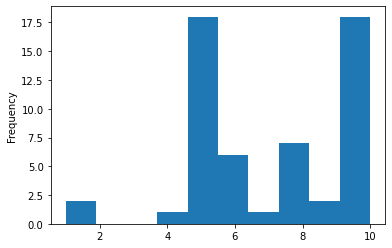

In [ ]:
import matplotlib.pyplot as plt
print(data.surveys['netPromoterScoreSurvey2']['rating'].value_counts())
data.surveys['netPromoterScoreSurvey2']['rating'].plot.hist(bins=10)
plt.show()

## Lookup User Accounts

We can also lookup user information from Firebase.

In [ ]:
data.auth

,localId,email,emailVerified,lastSignedInAt,createdAt,providerUserInfo
0,06ePfOUejfXMmivMFwKcUaxdhrv1,viviprincesa59@gmail.com,True,1636995011622,1636995011619,[]
1,08S4FM89rsSRq6ug6Mncpr1CMlu2,2kcy44k4tm@privaterelay.appleid.com,True,1635700016629,1635700016628,[]
2,0ACVNRDgUfMJP2oOW2DskNhW2It2,rdds5qrxd2@privaterelay.appleid.com,True,1621458672064,1621458672064,[]
3,0B1cnMjdE8eyzfMndbea8zbvZp43,hfnqkpw8vm@privaterelay.appleid.com,True,1633447758462,1633447758462,[]
4,0ERwOd9cINOJ1h6WGtjUu6IJMmw1,j.dustin29@icloud.com,True,1632865125644,1632865125643,[]
...,...,...,...,...,...,...
1857,ztCZSfLbAdOGA0kXYboyl7MbCMJ2,nppakp1112@gmail.com,True,1625678370783,1625678370783,[]
1858,zvUHw6t5IIebYpf73gCuJy1UhLk2,gdv016@icloud.com,True,1623044341764,1623044341764,[]
1859,zvzYZtomM4Y9IZyPkKPqL3zuUuG3,khalid.khalid.1970@icloud.com,True,1630265150457,1630265150457,[]
1860,zyhLcHqOBOhK9b0FVnE4SQIDKLH2,r8kst8cfhx@privaterelay.appleid.com,True,1622188434668,1622188434668,[]


## Analyzing the Logs

This is a skeletal version of looking at the log data.

In [ ]:
data.logs

,navigationDataTime,speechDataTime,PathType,PathID,AlignmentData,userId,pathDataTime,AlignmentDataTime,PathDate,speechData,...,PathZ,navigationX,navigationY,navigationZ,keypointX,keypointY,keypointZ,relativeError,PathHeadingAngles,navigationHeadingAngles
0,"[0.07216203212738037, 1.3788150548934937, 1.67...","[1.4188530445098877, 4.70460307598114, 35.6003...",notrated,3B0A6E9C-2BB2-41AB-A2D3-54493189FDC0٢٠٢١-٠٩-٢٧...,[],8F9979FD536347218AAF165CEC98EA57,"[0.30693304538726807, 0.6069209575653076, 0.90...",[],٢٠٢١-٠٩-٢٧T١٧:٠٩:١٤+03:00,"[اِنعَطِف يساراً, اِنعَطِف يساراً, انعَطِف يسا...",...,"[0.004352360963821411, 0.004219323396682739, 0...","[7.430841445922852, 7.4296159744262695, 7.4295...","[0.7981626391410828, 0.8002941608428955, 0.801...","[2.973135232925415, 2.9738519191741943, 2.9721...","[7.470771789550781, 7.782445907592773, 1.90529...","[0.7787894010543823, 0.6267911791801453, 0.599...","[2.966658115386963, 2.2700560092926025, -2.681...",0.087486,"[-72.90442478264401, 30.680566324979928, 4.581...","[117.2456232100797, -123.19399492330388, 118.1..."
1,"[0.0064809322357177734, 1.3128939867019653, 1....","[1.3612629175186157, 4.986591935157776, 8.8692...",notrated,3B0A6E9C-2BB2-41AB-A2D3-54493189FDC0٢٠٢١-٠٩-٢٨...,"[[-0.07839161902666092, -0.11386188119649887, ...",8F9979FD536347218AAF165CEC98EA57,"[0.307731032371521, 0.6077280044555664, 0.9077...","[25.66392993927002, 67.67158997058868, 67.9718...",٢٠٢١-٠٩-٢٨T١٥:٣٧:٥١+03:00,"[انعطف للخلف, تابع السير إلى الأمام, انعَطِف ي...",...,"[-0.00671716034412384, -0.007189858704805374, ...","[3.267936944961548, 3.273397922515869, 3.27569...","[0.025856316089630127, 0.029748108237981796, 0...","[-3.4835386276245117, -3.478729486465454, -3.4...","[3.3015034198760986, 2.354205846786499, 2.0380...","[-0.007633992005139589, -0.025722753256559372,...","[-3.496138334274292, -3.202819585800171, -3.50...",0.180896,"[-5.766164324792427, -89.38849232220218, -71.2...","[126.18856418274507, 116.97745001928841, 92.31..."
2,"[0.008569002151489258, 1.3140230178833008, 1.6...","[1.3382229804992676, 1.9149229526519775, 36.87...",notrated,3B0A6E9C-2BB2-41AB-A2D3-54493189FDC0٢٠٢١-٠٩-٢٧...,"[[-0.3754286468029022, -0.19452136754989624, 0...",8F9979FD536347218AAF165CEC98EA57,[],[32.03105401992798],٢٠٢١-٠٩-٢٧T٢٠:٥٠:١٥+03:00,"[توجه إلى اليمين قليلاً, اِنعَطِف يميناً, اِنع...",...,[],"[-1.52645742893219, -0.15131640434265137, 0.34...","[-0.7179383039474487, -0.35051655769348145, 0....","[1.2929267883300781, -0.24909156560897827, -0....","[-0.3226761519908905, 0.992796003818512, 5.652...","[-0.3495902121067047, -0.5120231509208679, -0....","[-0.1450566053390503, -0.2244987189769745, 3.8...",0.462089,[],"[55.36461328420061, 72.19696791115986, 68.0720..."
3,"[0.0011858940124511719, 1.3054059743881226, 1....","[1.3882019519805908, 15.160505890846252, 16.95...",notrated,3B0A6E9C-2BB2-41AB-A2D3-54493189FDC0٢٠٢١-٠٩-٢٧...,[],8F9979FD536347218AAF165CEC98EA57,"[0.30706799030303955, 0.6070640087127686, 0.90...",[],٢٠٢١-٠٩-٢٧T٢٠:٥١:٢٧+03:00,"[انعطف للخلف, تابع السير إلى الأمام, انعَطِف ي...",...,"[-0.0032520154491066933, -0.001961127854883671...","[-2.564075231552124, -2.5666086673736572, -2.5...","[0.1768215000629425, 0.1816515028476715, 0.180...","[1.982572078704834, 1.9841703176498413, 1.9831...","[-2.5493228435516357, -0.5062930583953857, 0.2...","[0.16304606199264526, 0.026946648955345154, 0....","[1.9781266450881958, 0.731978714466095, 0.8045...",0.257121,"[127.10893488019094, 113.8242219317575, -66.66...","[44.904103626883106, -156.68399205460855, -122..."
4,"[0.039910078048706055, 1.3482370376586914, 1.6...","[1.3884530067443848, 12.778312087059021, 19.71...",notrated,3B0A6E9C-2BB2-41AB-A2D3-54493189FDC0٢٠٢١-٠٩-٢٧...,"[[0.9594233632087708, -0.04082135483622551, -0...",8F9979FD536347218AAF165CEC98EA57,"[0.30253303050994873, 0.6025210618972778, 0.90...","[557.6288349628448, 679.1298689842224, 679.429...",٢٠٢١-٠٩-٢٧T١٧:١٨:٠٣+03:00,"[انعطف للخلف, تابع السير إلى الأمام, توجه إلى ...",...,"[0.33357274532318115, 0.3335148

## Analyzing Route Distance

This is an example of making a basic route length visualization.

2.877517     82
5.776700     60
0.007193     21
17.554707    17
61.652744    14
             ..
3.689237      1
5.249783      1
5.476157      1
3.070528      1
0.105807      1
Name: routeDistance, Length: 2757, dtype: int64


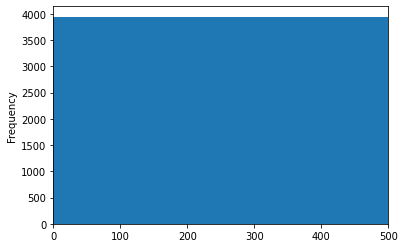

In [ ]:
print(data.logs['routeDistance'].value_counts())
data.logs['routeDistance'].plot.hist(bins=100)
plt.xlim([0, 500])
plt.show()

## User Segmentation Example

We can put the auth data together with the net promoter score survey to figure out, e.g., users that rated Clew as 10.

In [ ]:
nps = data.surveys['week1_netPromoterScore']
# TODO: could reindex the data by default with localId
auth_reindex = data.auth.set_index('localId')
auth_reindex.loc[nps[nps['rating'] == 10]['_uid'].unique()]

,email,emailVerified,lastSignedInAt,createdAt,providerUserInfo
localId,,,,,
X9EHkD1zeqWYyyyEvqT9HfbdgZV2,joshbenjaminfeldman@icloud.com,True,1623046754237,1623046754237,[]
cH48xtTR00PY70srwsAjd2MYzxE2,cjamesmc@hotmail.com,True,1622556726834,1622556726833,[]
eLOhVXYQWjbqd4XrHLLTt7W66GR2,ashbreger@yahoo.com,True,1624237417729,1624237417729,[]
OGiBWZqBYOWwgaj8epfynVH2t8I3,vy7ycy7n2n@privaterelay.appleid.com,True,1621532924296,1621532924296,[]
7sERn2oHLqbetlGCd21HIgY6Xrt2,piedrabuenasantiago@gmail.com,True,1621410048579,1621410048579,[]
9xYIdjByZMVhVMx699b9lUU7NsF2,luc.sterckx5@telenet.be,True,1623391588924,1623391588924,[]
Evd8IGmSR6VgW6qnzrqZExeBDRu2,dr6jf7nt2m@privaterelay.appleid.com,True,1630871920126,1621954014597,[]
GjlWxkKxGDcWO1VLCShOZz7BULM2,nzbg8mpjb9@privaterelay.appleid.com,True,1621282123533,1621282123532,[]
NgZZTFPHdAM9bXNBic7MLdSIA4K2,52ykkmrcr8@privaterelay.appleid.com,True,1621355773070,1621355773070,[]
